In [160]:
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [161]:
diabetes.data.shape

(442, 10)

In [162]:
diabetes.target.shape

(442,)

In [163]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [164]:
import pandas as pd

pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', None)

In [165]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['Diseaseprog'] = diabetes.target

In [166]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diseaseprog
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [167]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diseaseprog
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


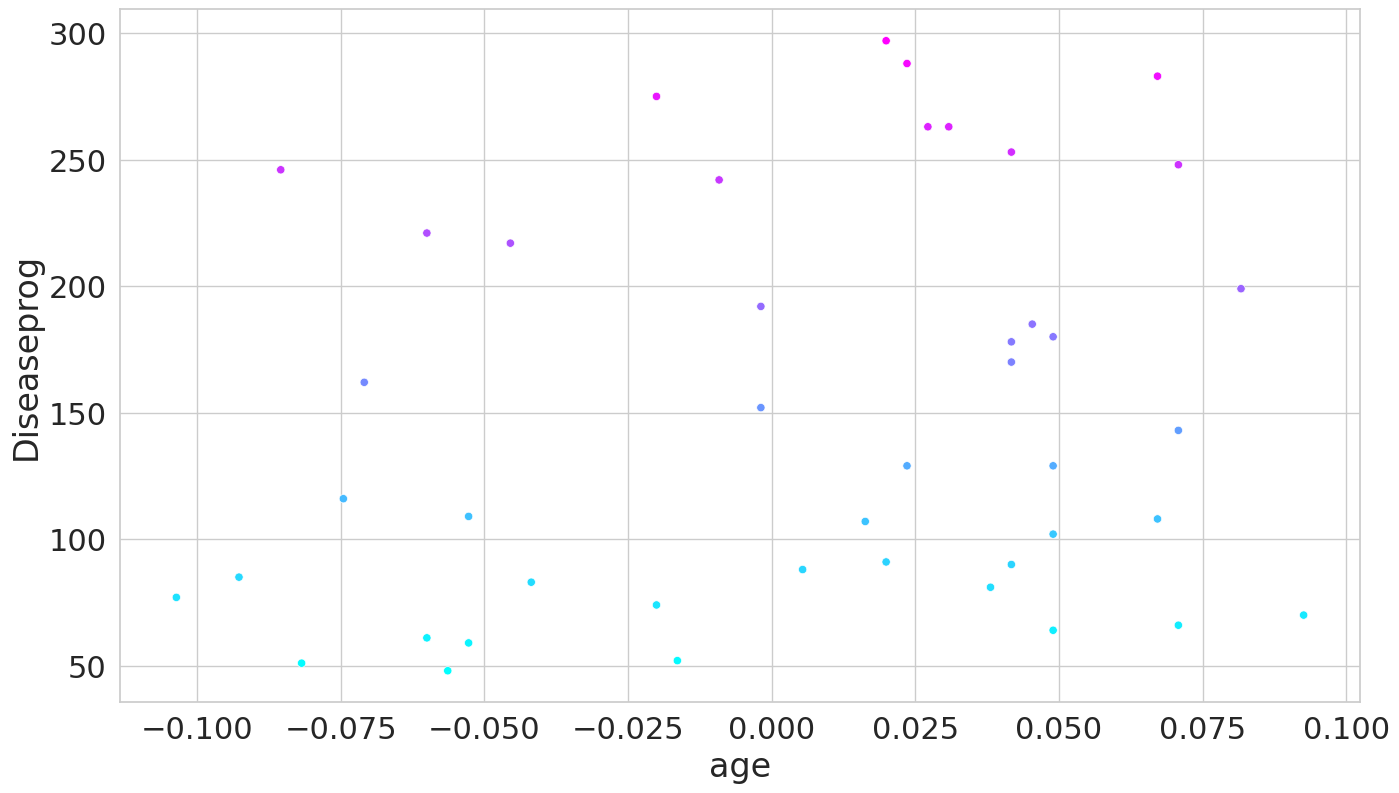

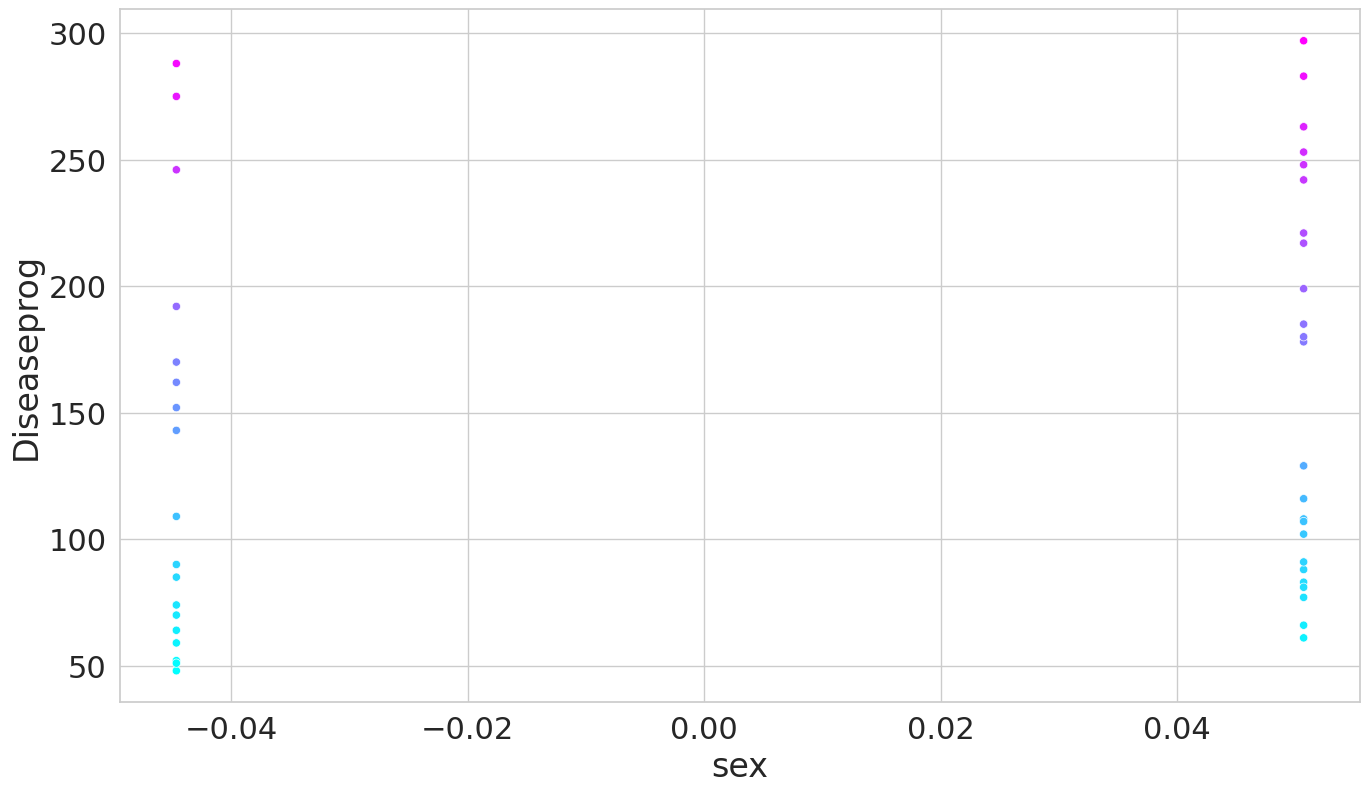

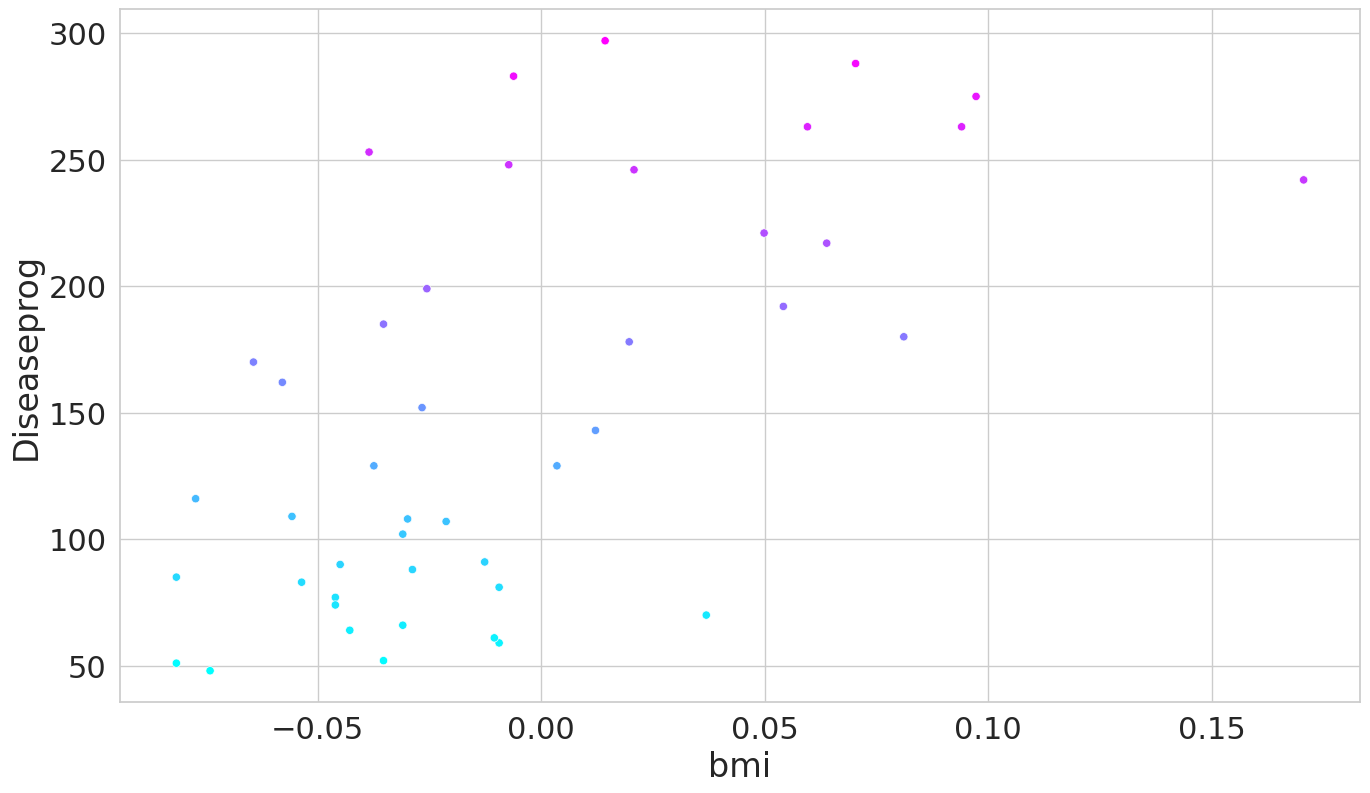

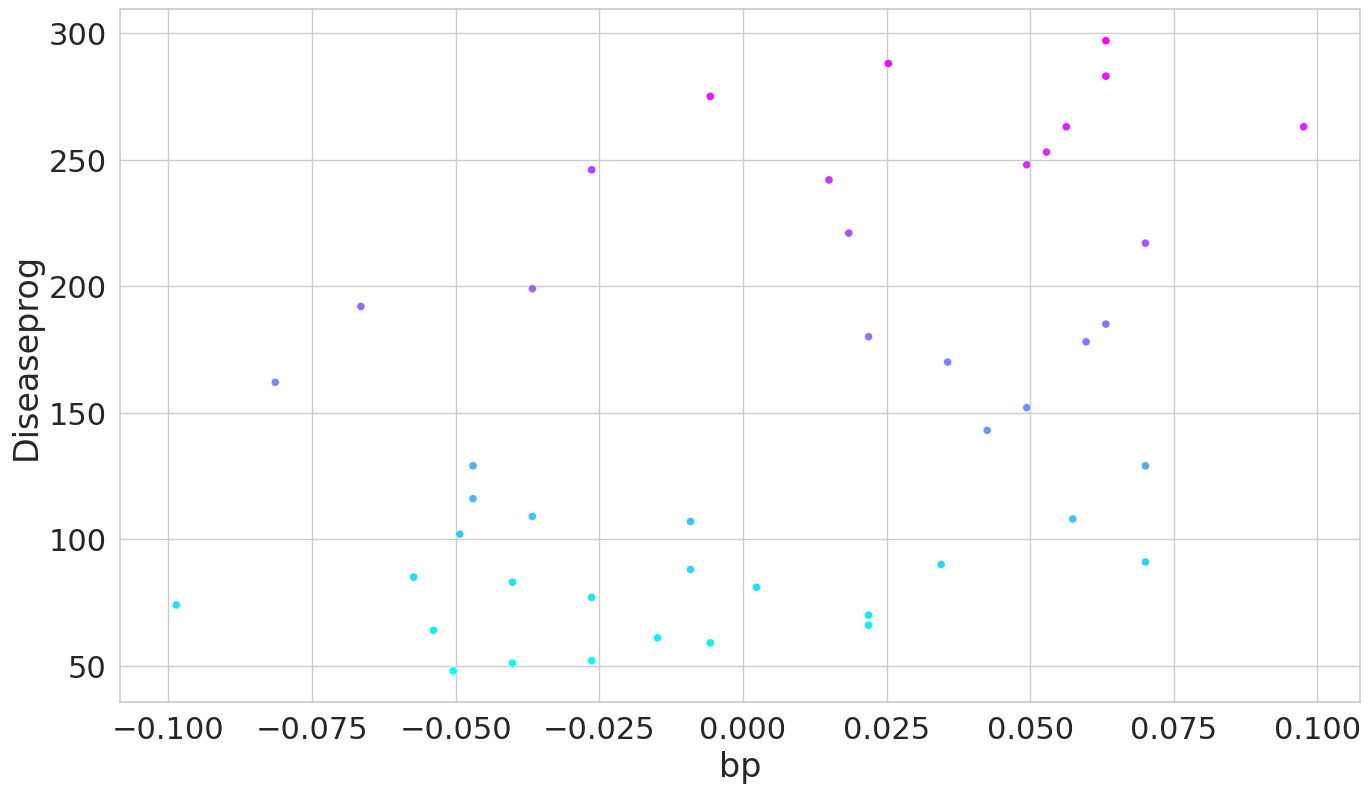

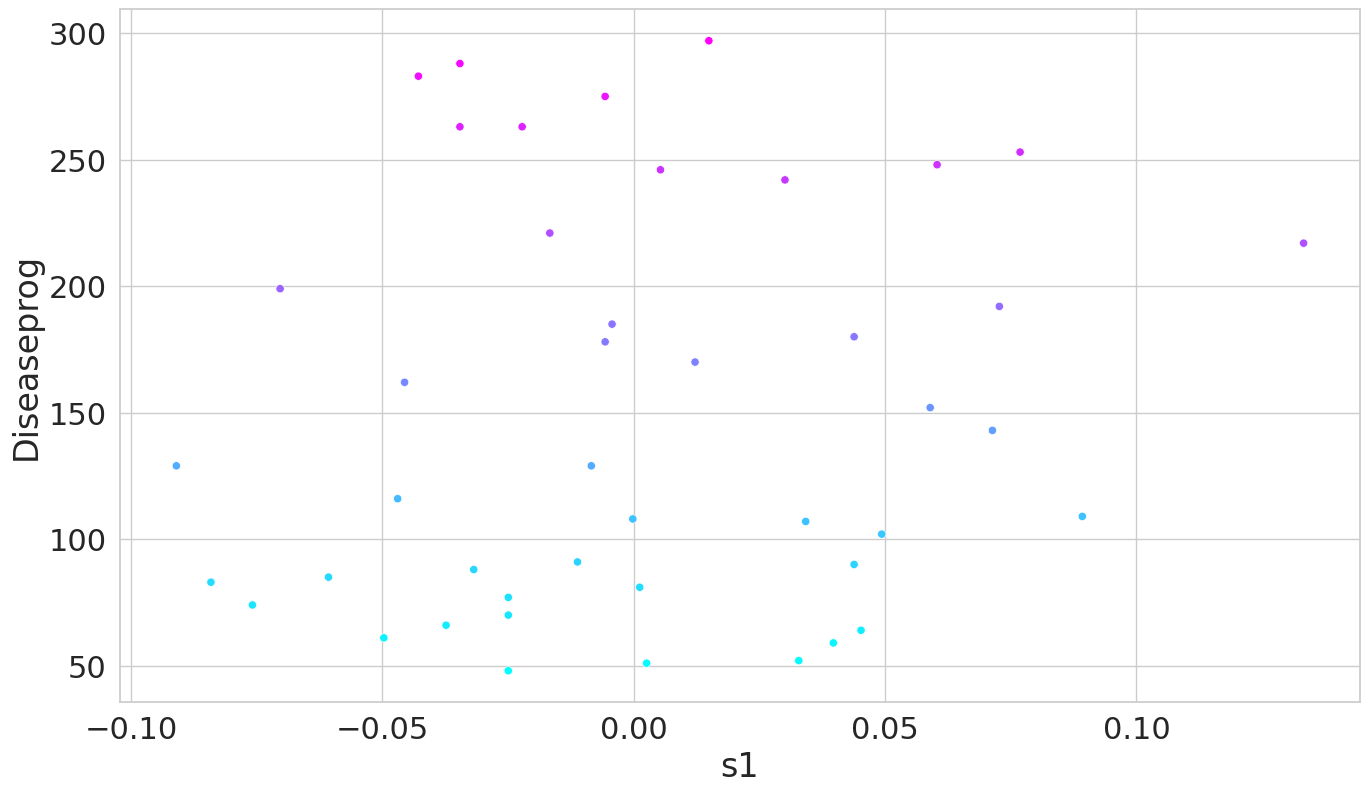

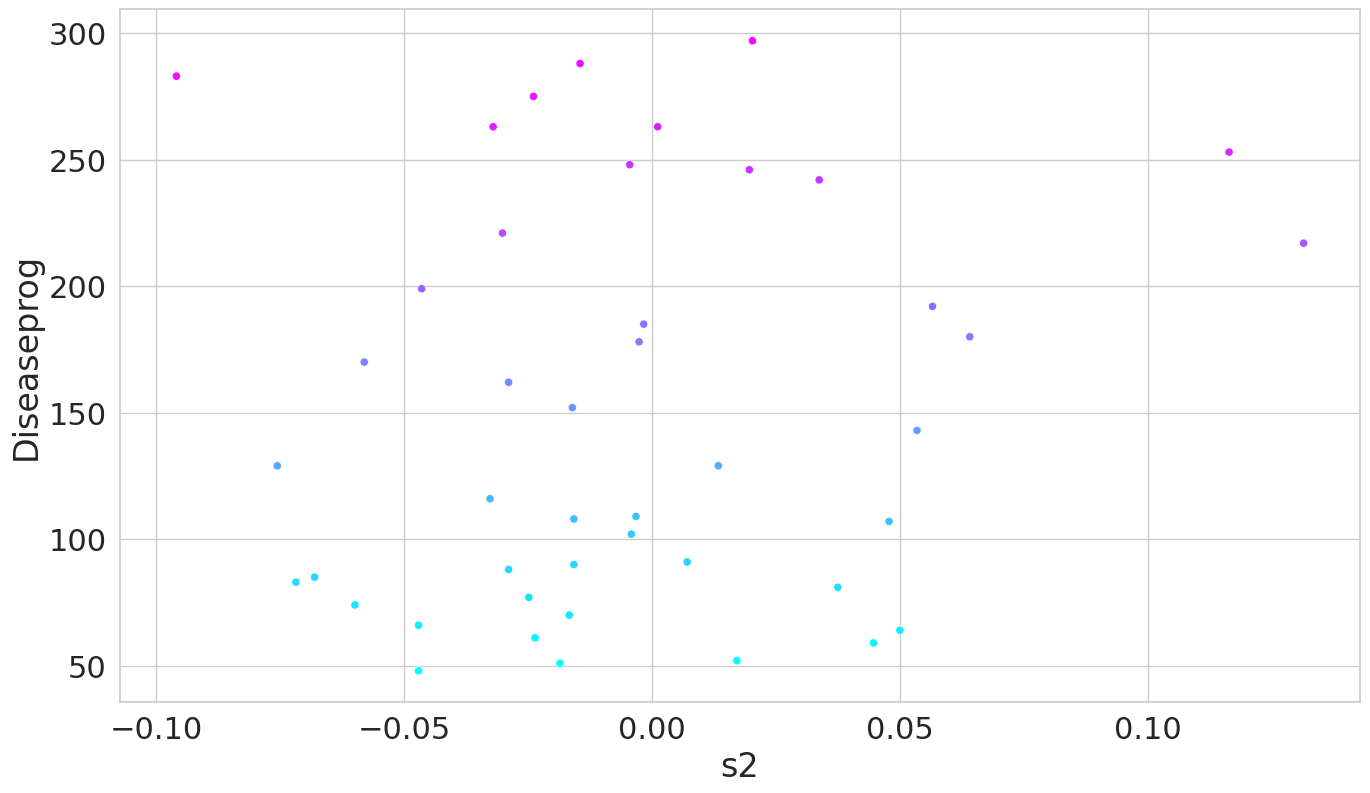

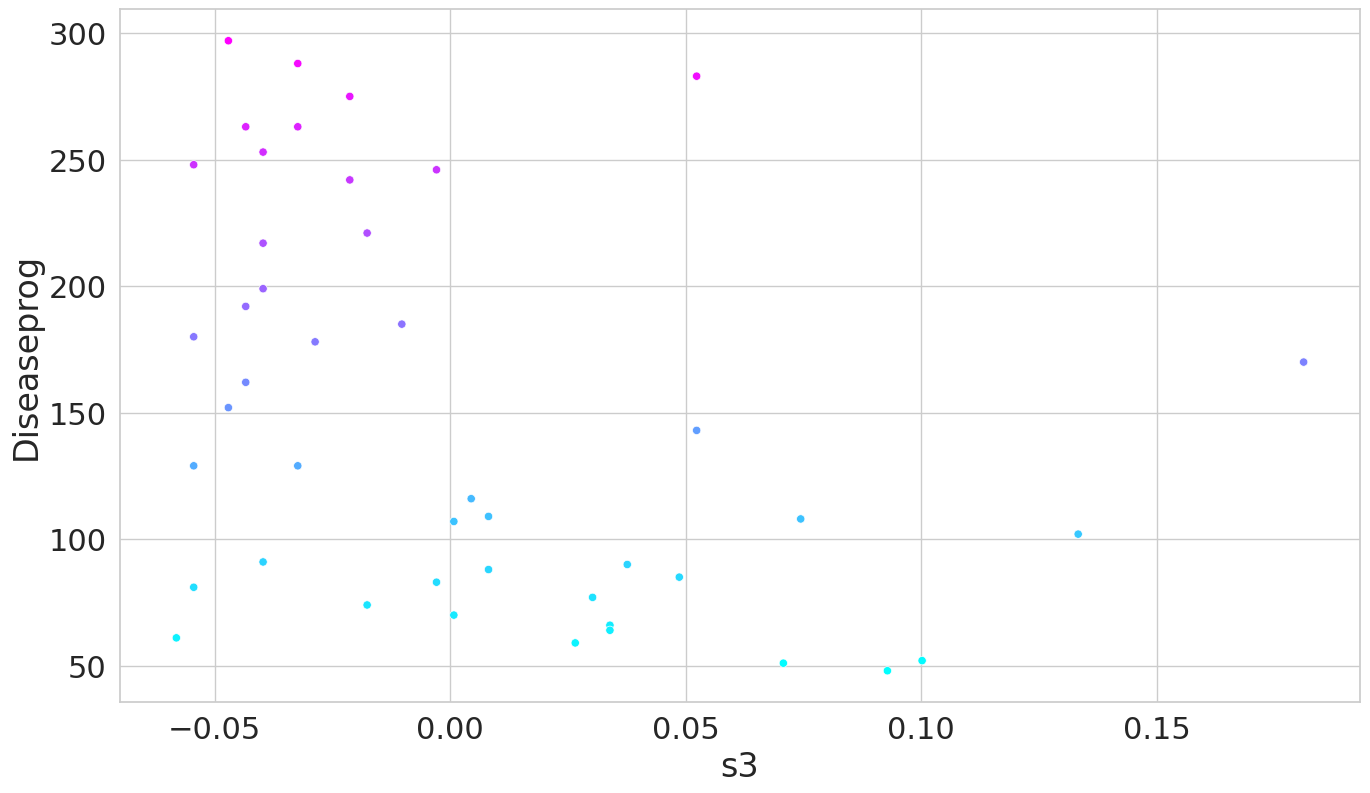

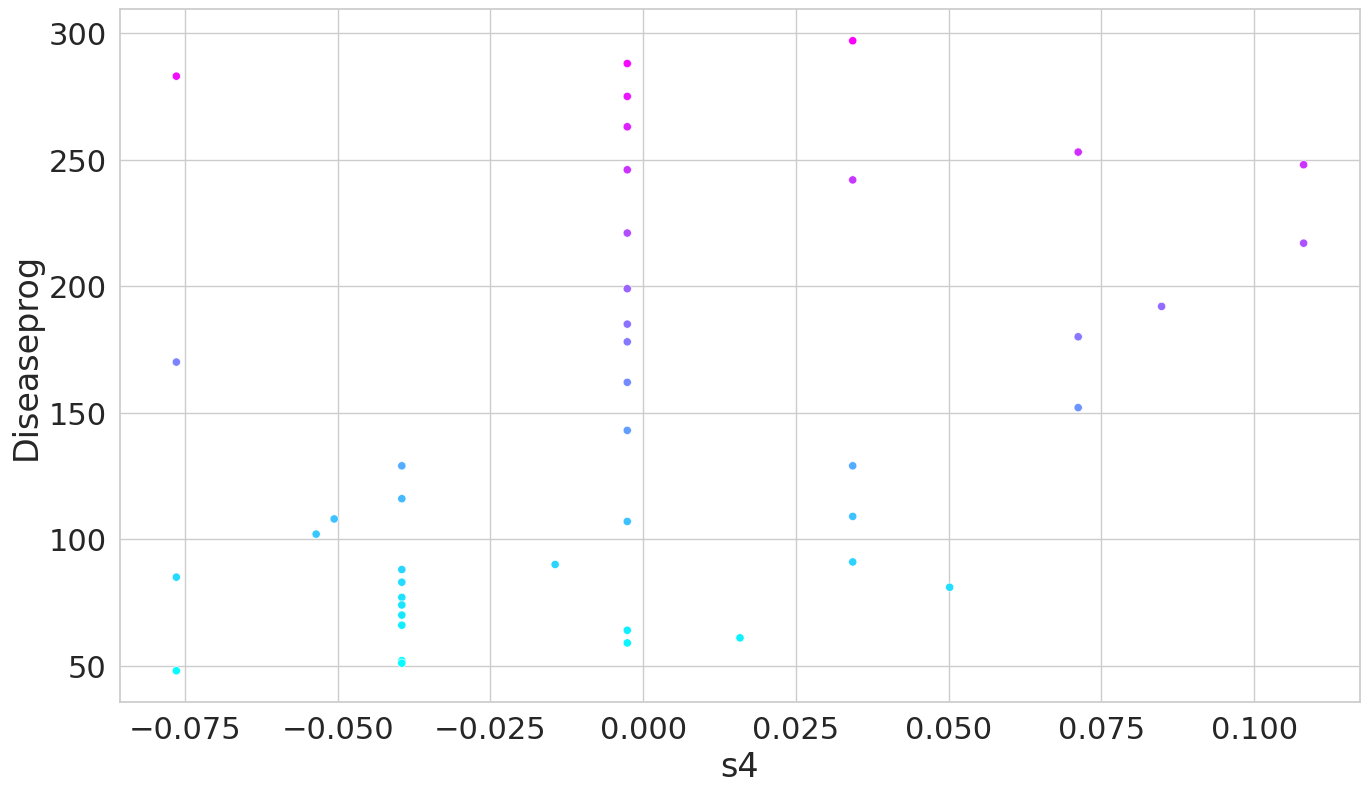

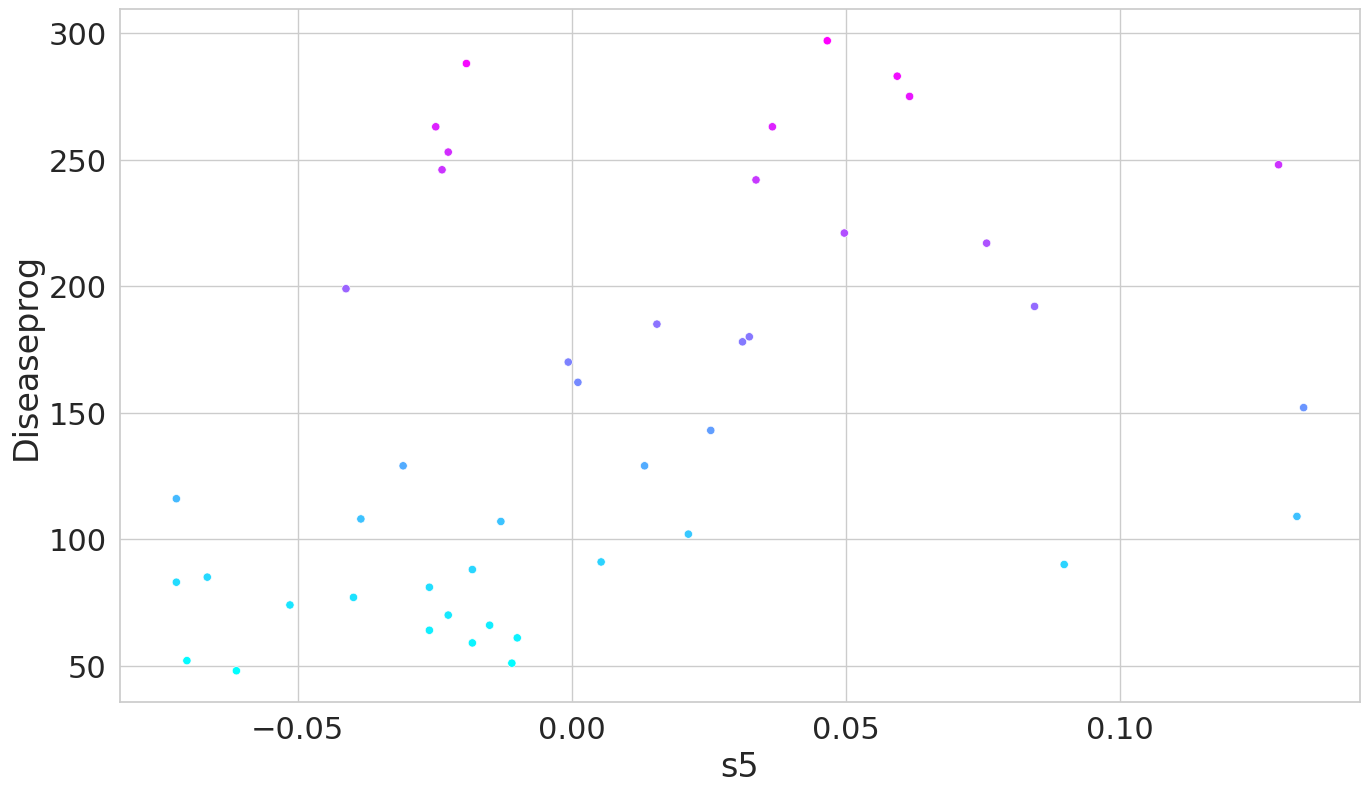

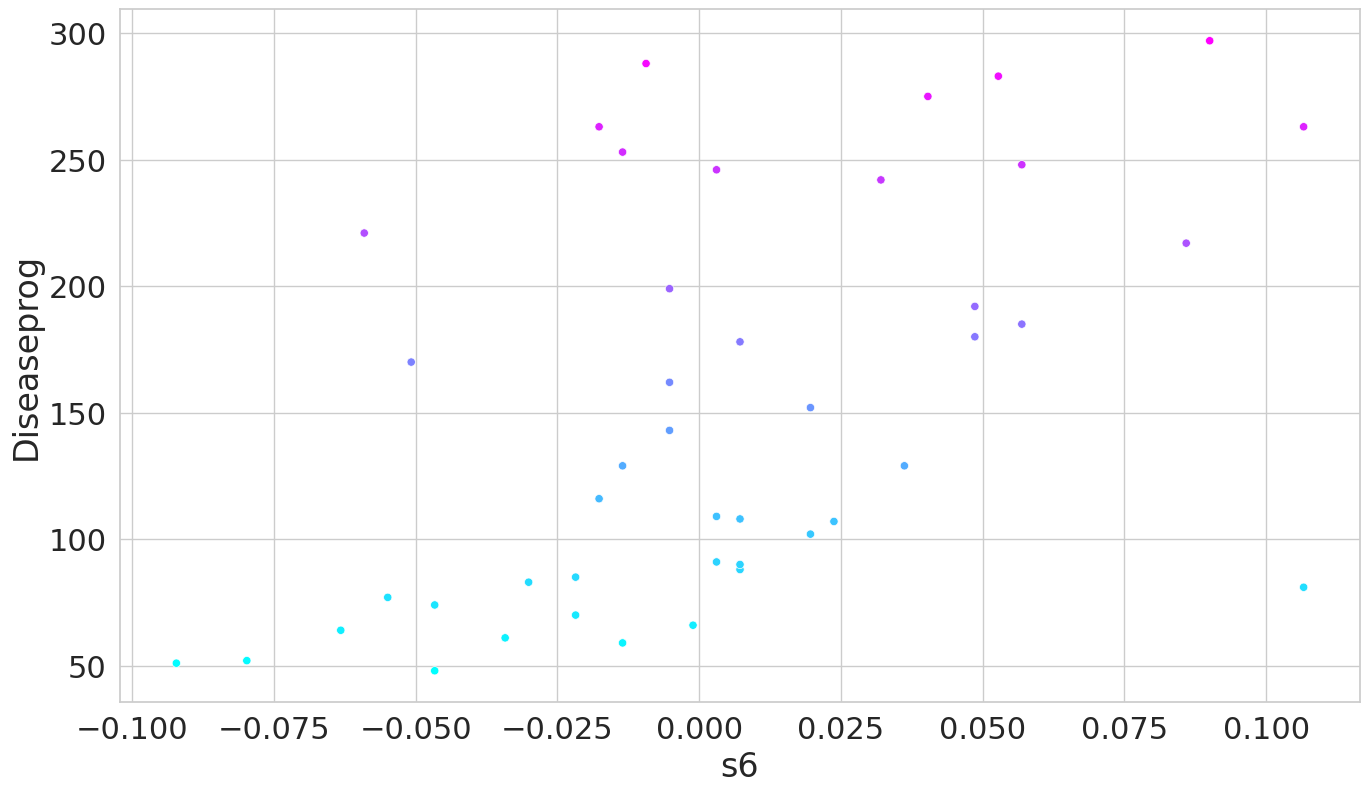

In [168]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
  plt.figure(figsize=(16, 9))
  sns.scatterplot(data=sample_df , x=feature, y='Diseaseprog',hue='Diseaseprog', palette='cool', legend=False)


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [170]:
X_train.shape

(331, 10)

In [171]:
X_test.shape

(111, 10)

In [172]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}, {linear_regression.coef_[i]}')

       age, -60.21981405677291
       sex, -266.45705232203574
       bmi, 523.0634112596993
        bp, 310.5134699670048
        s1, -336.1614738106944
        s2, 137.3392923842451
        s3, -131.13923283453653
        s4, -1.1492348017315557
        s5, 622.3286855688128
        s6, 60.466457691682535


In [173]:
predicted=linear_regression.predict(X_test)
expected=y_test

In [174]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [175]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [176]:
df= pd.DataFrame()
df['expected']=pd.Series(expected)
df['predicted']=pd.Series(predicted)

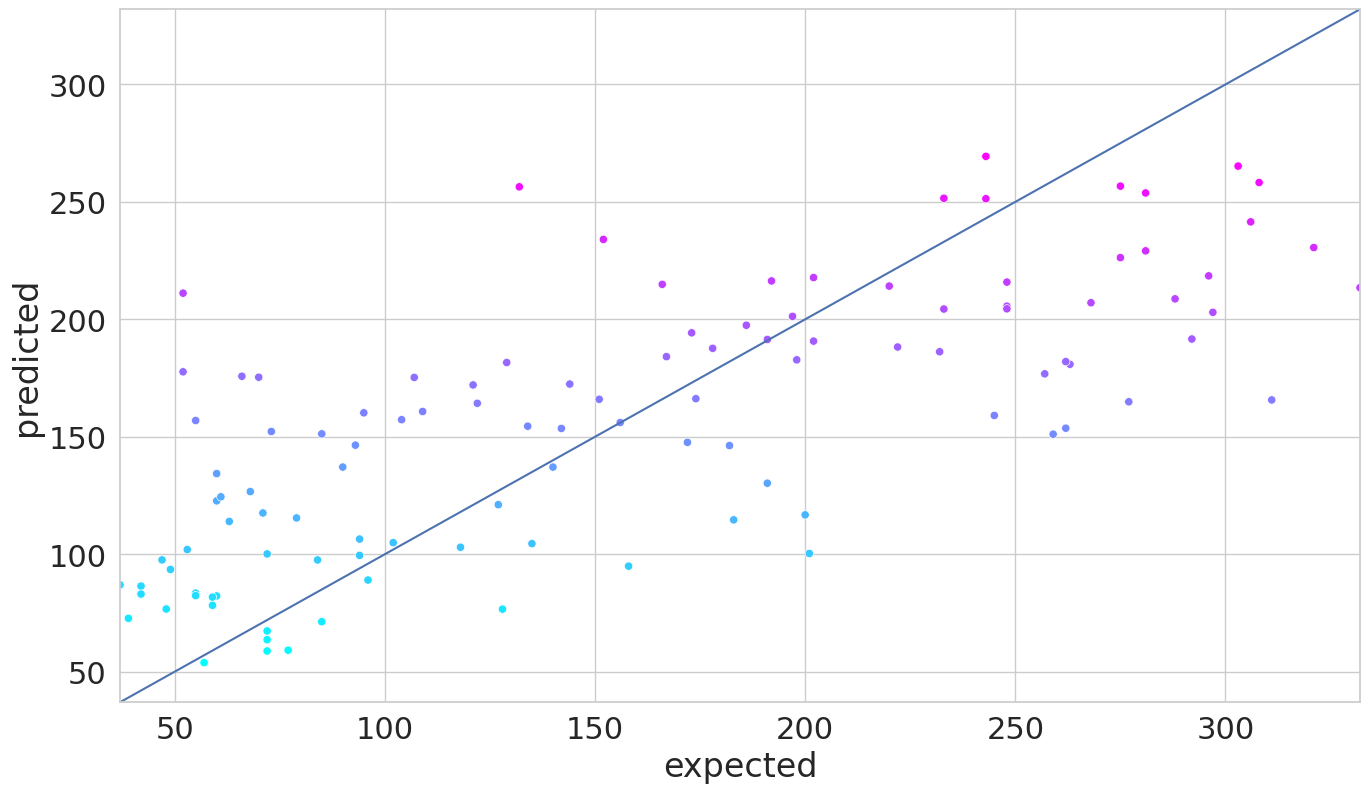

In [177]:
figure=plt.figure(figsize=(16,9))
axes=sns.scatterplot(data=df,x='expected',y='predicted',hue='predicted', palette='cool',legend=False)

start=min(expected.min(),predicted.min())
end=max(expected.max(),predicted.max())

axes.set_xlim(start,end)
axes.set_ylim(start,end)

line=plt.plot([start,end],[start,end])

In [178]:
from sklearn import metrics

metrics.r2_score(expected,predicted)

0.5322429620529407

In [179]:
metrics.mean_squared_error(expected,predicted)

3458.2307025173577

In [180]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators= {'linear_regression': linear_regression,
             'elastic_net': ElasticNet(),
             'lasso': Lasso(),
             'ridge': Ridge()
             }

In [181]:
from sklearn.model_selection import KFold,cross_val_score

for estimator_name, estimator_object in estimators.items():
  kfold=KFold(n_splits=10,random_state=11,shuffle=True)
  scores=cross_val_score(estimator=estimator_object,X=diabetes.data,y=diabetes.target,cv=kfold,scoring='r2')
  print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

linear_regression: mean of r2 scores=0.475
     elastic_net: mean of r2 scores=-0.002
           lasso: mean of r2 scores=0.339
           ridge: mean of r2 scores=0.421
